# Linear Algebra Formulation for Support Vector Machines
1. [The Goal of Support Vector Machines](#goal)
2. [Vectors](#vectors)
3. [Understanding the Equation of a Hyperplane](#hyperplane)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs

from sklearn.svm import SVC

## The Goal of Support Vector Machines <a name="goal"></a>
"To find the optimal separating hyperplane which maximizes the margin of the training data"

### What is a "Separating Hyperplane"?

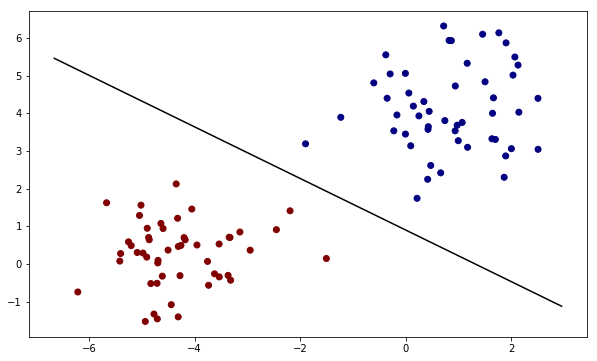

In [83]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'jet')

# Create support vector classifier
svc = SVC(kernel='linear')

# Train model
clf = svc.fit(X, y)

# Get x and y lims
ax_1 = plt.gca()
xlim = ax_1.get_xlim()
ylim = ax_1.get_ylim()

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1], 100)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot optimal separating hyperplane
plt.plot(xx, yy, 'k-')

fig = plt.gcf() 
fig.set_size_inches(10,6)

This is an intuitive example of a hyperplane in 2-dimensions. This definition can be generalized and expanding to any number of dimensions!
* In 1-D, a hyperplane is a point
* In 2-D, a hyperplane is a line
* In 3-D, a hyperplane is a plane
* In 4-D+, it is simply referred to as a hyperplane.

### What is the optimal separating hyperplane?

It appears that there can be many different separating hyperplanes (often there is infinite). How do we choose the optimal one? Remember, the goal of the SVM is to maximize the margin of the training data. In other words, we're going to choose the hyperplane that is as far away as possible from each class of datapoints

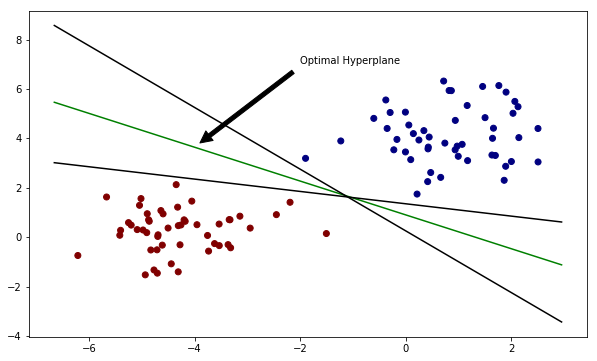

In [84]:
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'jet')


# Get x and y lims
ax_1 = plt.gca()
xlim = ax_1.get_xlim()
ylim = ax_1.get_ylim()

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1], 100)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot optimal separating hyperplane
plt.plot(xx, yy, 'k-', c='g')

#annotating optimal hyperplane
ax_1.annotate('Optimal Hyperplane', xy=(-4, 3.65), xytext=(-2, 7),
            arrowprops=dict(facecolor='black', shrink=0.05),)

# plot other hyperplanes
y1 = -1.25 * xx + .25
plt.plot(xx, y1, 'k-')
y2 = -.25 * xx + 1.35
plt.plot(xx, y2, 'k-')

fig = plt.gcf() 
fig.set_size_inches(10,6)

### Why choose Hyperplane that maximizes the margin of the training data?
It generalizes better to classifying unseen observations -> (makes better predictions)

## Vectors <a name="vectors"></a>
The data points that we work with (we generally think of these in terms of spreadsheets) can be interpreted as vectors, which we can then plot! (in this graph, for simplicity, I only graphed 5 data points).

In [106]:
spreadsheet = pd.DataFrame(np.round(X[1:6,:], 1), columns = ['Feature 1 (X_1)', 'Feature 2 (X_2)']).head()

$X_1=\left[\begin{matrix}
-2.9\\
-3.4\\
1.9\\
-4.8\\
1.6
\end{matrix}
\right],\ 
X_2 = \left[\begin{matrix}
0.4\\
-0.3\\
2.9\\
-1.3\\
3.3
\end{matrix}
\right]
$

<p float="left">
  <img src="Figures/spreadsheet_to_vectors.png" width="9000" />
</p>

Below, you'll see an enlarged version of the rightmost graph in the diagram above.

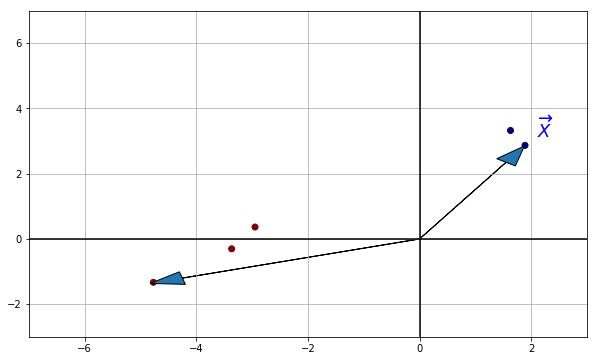

In [129]:
# Generating vectors_graph.png
plt.scatter(X[1:6,0], X[1:6,1], c=y[1:6], cmap = 'jet')
ax_1 = plt.gca()
#adding vectors
plt.arrow(0,0,-4.25,-1.2, head_width=.4)
plt.arrow(0,0,1.55,2.35, head_width = .4)

#plotting axes
ax_1.axhline(y=0, color='k')
ax_1.axvline(x=0, color='k')

# labeling X
ax_1.text(2.1, 3.1, r'$\overrightarrow{X}$', fontsize=18, color='b')


plt.grid(True)
plt.xlim(-7,3)
plt.ylim(-3,7)

fig = plt.gcf() 
fig.set_size_inches(10,6)
fig.savefig('Figures/vectors_graph.png')
#plt.close(fig) 

### What is a vector?
> Vector: A quantity having direction as well as magnitude.

* The magnitude of a vector (also called its norm) is it's geometric length. For a vector $\overrightarrow{v}$, its magnitude is written as $||\overrightarrow{v}||$

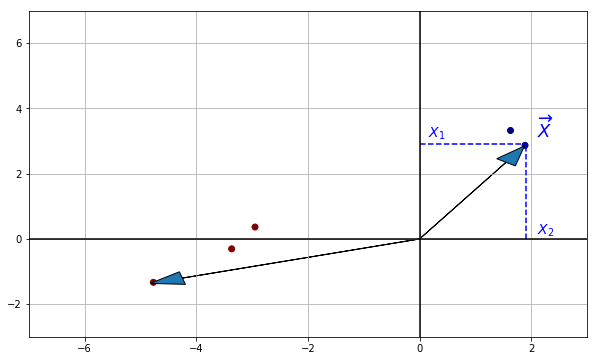

In [128]:
# Generating vectors_graph.png
plt.scatter(X[1:6,0], X[1:6,1], c=y[1:6], cmap = 'jet')
ax_1 = plt.gca()

#adding vectors
plt.arrow(0,0,-4.25,-1.2, head_width=.4)
plt.arrow(0,0,1.55,2.35, head_width = .4)

# adding X1 and X2
x1 = np.array([1.9,1.9])
y1 = np.array([0,2.9])
plt.plot(x1,y1, 'b--')
x2 = np.array([0,1.9])
y2 = np.array([2.9,2.9])
plt.plot(x2,y2, 'b--')

# annotating
ax_1.text(.15, 3.1, r'$X_1}$', fontsize=14, color = 'b')
ax_1.text(2.1, .15, r'$X_2}$', fontsize=14, color = 'b')
ax_1.text(2.1, 3.1, r'$\overrightarrow{X}$', fontsize=18, color='b')

#plotting axes
ax_1.axhline(y=0, color='k')
ax_1.axvline(x=0, color='k')

plt.grid(True)
plt.xlim(-7,3)
plt.ylim(-3,7)

fig = plt.gcf() 
fig.set_size_inches(10,6)

Now, we have (you can think of them as lengths) $X_1$ and $X_2$, we calculate the magnitude of $\overrightarrow{X}$, (which is the magnitude of $\overrightarrow{X}$, written $||\overrightarrow{X}||$) using Pythagorea's theorem:
$$a^2+b^2=c^2$$
Adapted for our purposes, we get that $$\sqrt{(X_1)^2+(X_2)^2}=||\overrightarrow{X}||$$

* The direction vector is calculated by dividing each element of the vector by its norm.
So, 
$$\text{given $\overrightarrow{X}$}=\left[\begin{matrix}X_1\\X_2\end{matrix}\right],\  \text{the direction of $\overrightarrow{X}$ is calculated as:}\ \left[\begin{matrix}\frac{X_1}{||\overrightarrow{X}||}\\\frac{X_2}{||\overrightarrow{X}||}\end{matrix}\right]$$

It's important to note that **the magnitude of a vector is a real number, while the direction of a vector is another vector.**

### Dot Product
The dot product has many different names across fields of mathematics: inner product, and linear combination are also common. Regardless of its name, it is a useful operation to use between vectors. To put it simply, if you take the dot product of two vectors, you multiply all their corresponding elements and take the sum.
(note that the vectors must have the same dimensions)

If we have two vectors:
$$\overrightarrow{X}=\left[\begin{matrix}X_1\\X_2\end{matrix}\right], \overrightarrow{Y}=\left[\begin{matrix}Y_1\\Y_2\end{matrix}\right]$$

Then the dot product is calculated as follows:
$$\overrightarrow{X} \cdot \overrightarrow{Y}= \sum_{i=1}^{2}X_iY_i = X_1Y_1+X_2Y_2$$

note: in linear algebra, the inner product is represented like so: $\langle \overrightarrow{X}, \overrightarrow{Y} \rangle$

**Don't forget to add the geometric respresentation of the dot prouct! Just put it in a different notebook and link to it**
[this explanation by Alexandre Kowalczyk](https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-2/) is the best

### Vector Projections

## Understanding the Equation of a Hyperplane <a name="hyperplane"></a>